## Importing Laibraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Loading Dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

# Labels Description In Numbers
The Labels are in the form of numbers in data.

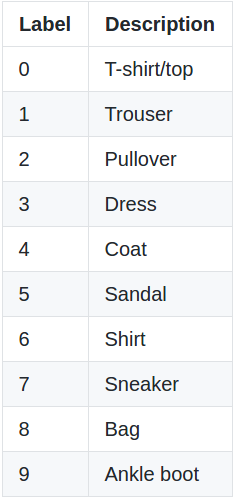

Image:AxesImage(size=(28, 28))
Label:9


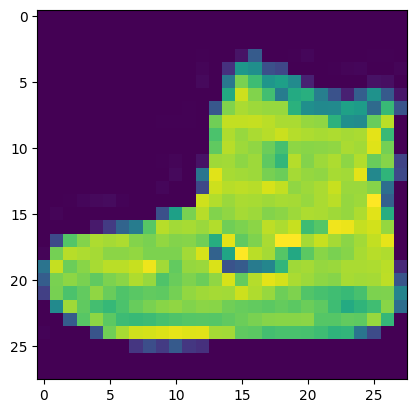

In [ ]:
print(f"Image:{plt.imshow(x_train[0])}")
print(f"Label:{y_train[0]}")

Image:AxesImage(size=(28, 28))
Label:5


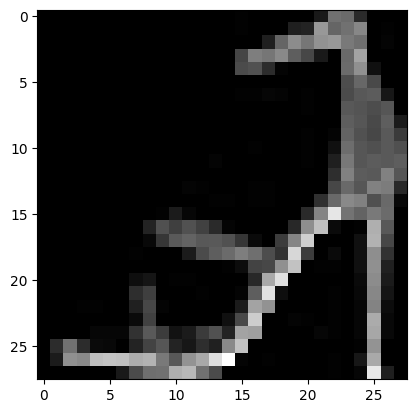

In [ ]:
#print with white color
print(f"Image:{plt.imshow(x_train[899],cmap='gray')}")
print(f"Label:{y_train[899]}")

## Displaying Some Samples

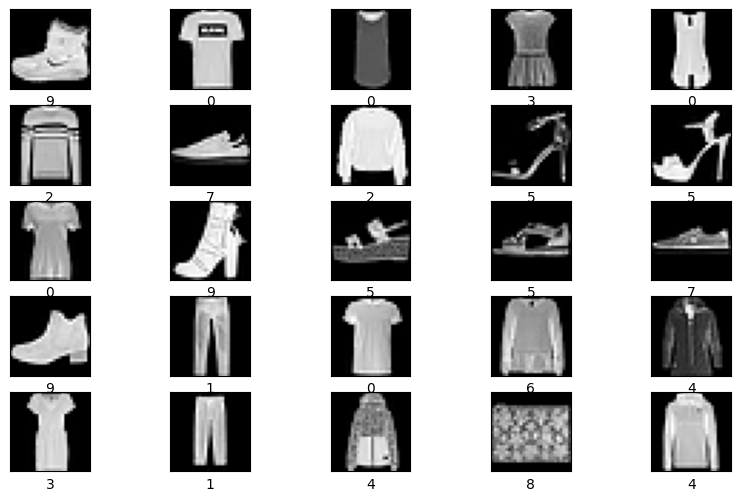

In [ ]:
plt.figure(figsize=(10,6))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap='gray')
  plt.xlabel(y_train[i])
plt.show()

# Exploratory Data Analysis **EDA**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

# Displaying The Image With Their Each Pixel Value

Image


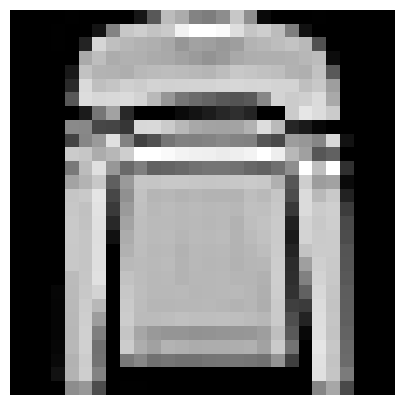

Pixel Values:
  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143   9   0   0   0   1   0   0   0   0   0 
  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197 206 188 126  17   0   0   0   0   0   0 
  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179 183 189 195 185  82   0   0   0   0   0 
  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174 175 175 177 183 188  12   0   0   0   0 
  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197 193 190 178 175 194  90   0   0   0   0 
  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213 214 211 211 191 200 158   0   0   0   0 
  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90 135 212 203 207 219 169   0   0   0   0 
  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36   0   0 203 230 220 203   0   0   0   0 
  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 162 163 178 221 186  3

In [ ]:
# Image
print("Image")
plt.figure(figsize=(5,5))
plt.imshow(x_train[5],cmap='gray')
plt.axis(False)
plt.show()

# Pixel Values
print("Pixel Values:")
for row in x_train[5]:
  for pixel in row:
    print("{:3}".format(pixel),end=" ")
  print()

## Reshape The Data To Include Color Arguments

In [ ]:
x_train=x_train.reshape(60000, 28, 28,1)
x_test=x_test.reshape(10000, 28, 28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

# Normalizing The Data

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

## Changing The Data Type To float

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# Displaying The Image With Their Each Pixels Value After Normalization

Image:


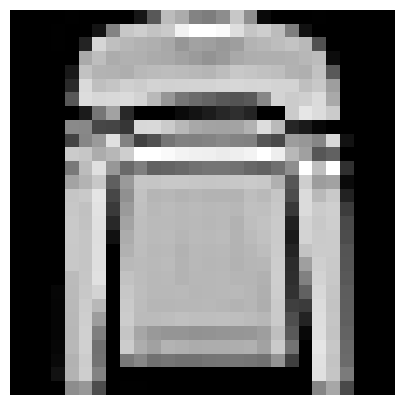

Pixle Values:
0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.000 0.000 0.086 0.345 0.737 0.675 0.518 0.490 0.553 0.780 0.561 0.035 0.000 0.000 0.000 0.004 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.004 0.000 0.000 0.078 0.514 0.780 0.808 0.769 0.792 0.949 1.000 1.000 0.980 0.871 0.773 0.808 0.737 0.494 0.067 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.004 0.000 0.137 0.839 0.749 0.718 0.698 0.686 0.659 0.588 0.635 0.624 0.596 0.620 0.702 0.718 0.741 0.765 0.725 0.322 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.667 0.745 0.675 0.694 0.690 0.671 0.663 0.635 0.608 0.580 0.604 0.663 0.682 0.686 0.686 0.694 0.718 0.737 0.047 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.098 0.761 0.706 0.698 0.682 0.722 0.733 0.741 0.733 0.722 0.710 0.741 0.784 0.773 0.757 0.745 0.698 0.686 0.761 0.353 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.165 0.855 0.749 0.773 0.816 0.800 0.827 0.820 0.824 0.831 0.827 0.839 0.843 0.835 0.839 0.827 0.827 0.749 0.784 0.6

In [ ]:
print("Image:")
plt.figure(figsize=(5,5))
plt.imshow(x_train[5],cmap='gray')
plt.axis(False)
plt.show()

print("Pixle Values:")
for row in x_train[5]:
  for pixle in row:
    print("{:0.3f}".format(float(pixle)),end=" ")
  print()

## Data Modeling With CNN

In [ ]:
model=tf.keras.Sequential([

      # input Layer
      tf.keras.layers.InputLayer(input_shape=(28,28,1)),

      # hidden layers
      tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"), #convolutional layer

      tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"), #convolutional layer


      tf.keras.layers.MaxPool2D(), #convolutional layer

      tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"), #convolutional layer

      tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu"), #convolutional layer

      tf.keras.layers.MaxPool2D(), #convolutional layer

      tf.keras.layers.Flatten(),  #flatten layer

      # output layer
      tf.keras.layers.Dense(10,activation='softmax')


])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_38 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 12, 12, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_40 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 4, 4, 10)          0         
 ng2D)                                                

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(x_train,y_train,epochs=25,batch_size=100,validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 4s 5ms/step - loss: 0.8064 - accuracy: 0.7076 - val_loss: 0.6015 - val_accuracy: 0.7663
Epoch 2/25
480/480 [==============================] - 2s 5ms/step - loss: 0.5132 - accuracy: 0.8115 - val_loss: 0.4730 - val_accuracy: 0.8266
Epoch 3/25
480/480 [==============================] - 2s 5ms/step - loss: 0.4430 - accuracy: 0.8411 - val_loss: 0.4269 - val_accuracy: 0.8461
Epoch 4/25
480/480 [==============================] - 3s 6ms/step - loss: 0.4017 - accuracy: 0.8571 - val_loss: 0.3849 - val_accuracy: 0.8618
Epoch 5/25
480/480 [==============================] - 2s 5ms/step - loss: 0.3758 - accuracy: 0.8653 - val_loss: 0.3680 - val_accuracy: 0.8680
Epoch 6/25
480/480 [==============================] - 2s 5ms/step - loss: 0.3570 - accuracy: 0.8723 - val_loss: 0.3571 - val_accuracy: 0.8747
Epoch 7/25
480/480 [==============================] - 2s 5ms/step - loss: 0.3441 - accuracy: 0.8769 - val_loss: 0.3415 - val_accuracy: 0.8793
Epoch 

# Graph Representation Of Loss & Accuracy

### 1. Loss

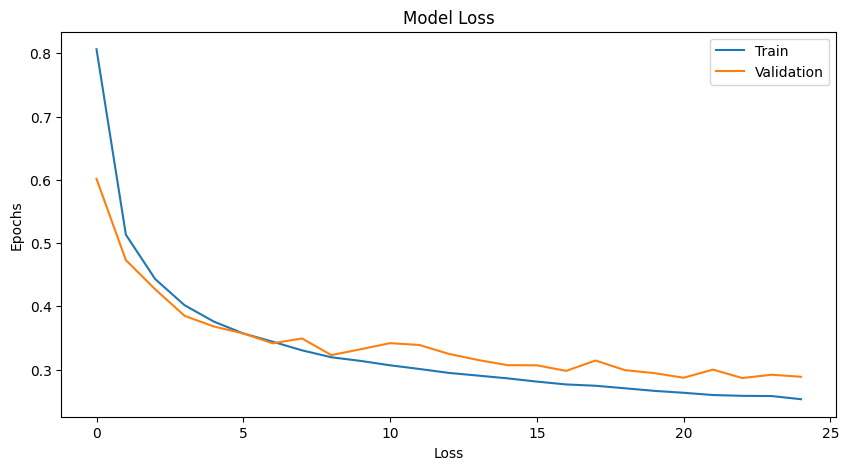

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Model Loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Loss")
plt.ylabel('Epochs')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

### 2. Accuracy

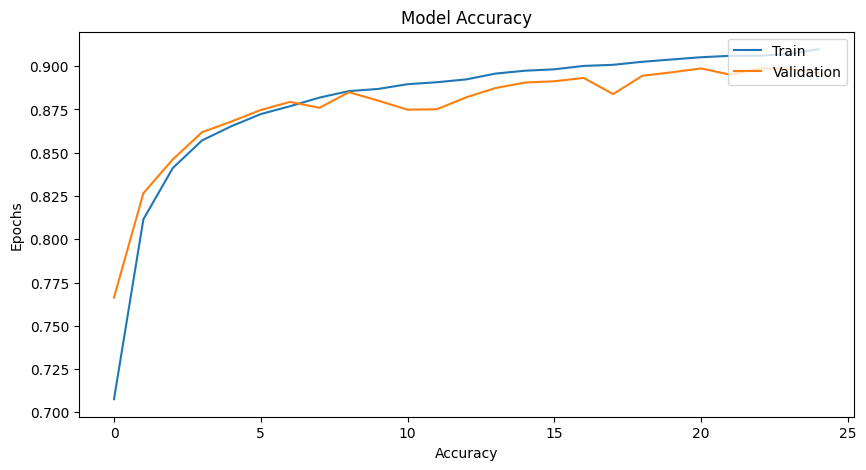

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Model Accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Accuracy")
plt.ylabel('Epochs')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

## Evaluation of Loss & Accuracy on Test Data

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss: {loss*100}")
print(f"Test Accuracy: {accuracy*100}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3049 - accuracy: 0.8919
Test Loss: 30.49367070198059
Test Accuracy: 89.19000029563904
